In [6]:
import cv2
import matplotlib.pyplot as plt
from immas import MammogramImage , preprocessing , segmentation
from immas.io import read_dataset
from immas.basic_functions import show_image_plt
from immas import preprocessing
import os

Text(0.5,1,'Ground truth')

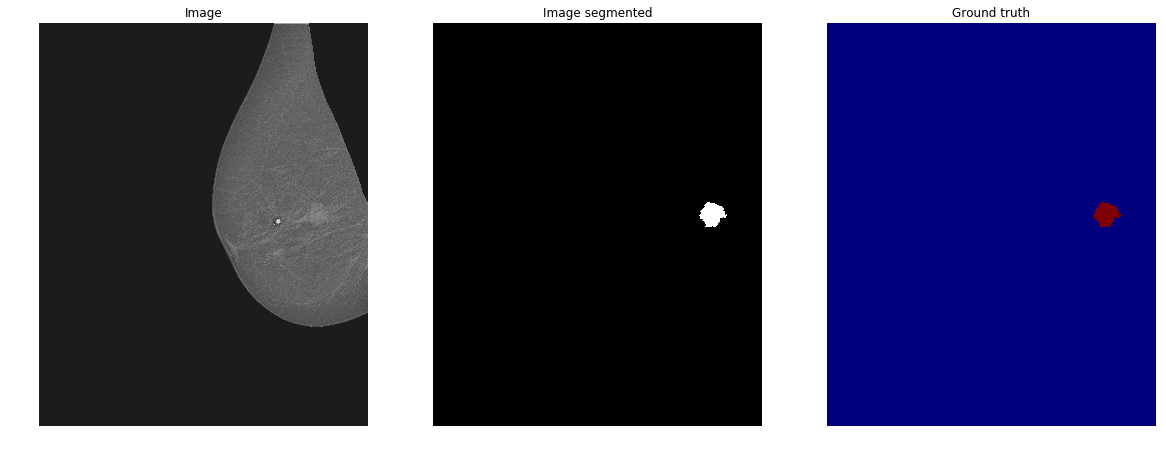

In [2]:
path_image = "/Users/briannaburton/Documents/Masters/S2-Cassino/Advanced-Image-Analysis/AIA-2018/dataset/masses_examples_preprocessed/22670855_0b7396cdccacca82_MG_R_ML_ANON.tif"
path_grnd = "/Users/briannaburton/Documents/Masters/S2-Cassino/Advanced-Image-Analysis/AIA-2018/dataset/groundtruth/22670855_0b7396cdccacca82_MG_R_ML_ANON.tif"

# read images
img_prp = cv2.imread(path_image, 0)
img_grnd = cv2.imread(path_grnd, 0)

# Generate labels on the groundltruth
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_grnd)

plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
plt.axis("off")
plt.imshow(img_prp, interpolation="nearest", cmap=plt.cm.gray)
plt.title('Image')

plt.subplot(1,3,2)
plt.axis("off")
plt.imshow(img_grnd, interpolation="nearest", cmap=plt.cm.gray)
plt.title('Image segmented')

plt.subplot(1,3,3)
plt.axis("off")
plt.imshow(labels, interpolation="nearest", cmap="jet")
plt.title('Ground truth')



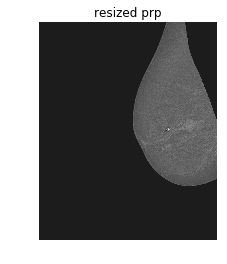

(4084, 3328)
(2858, 2329)


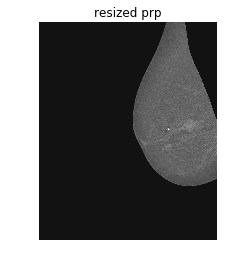

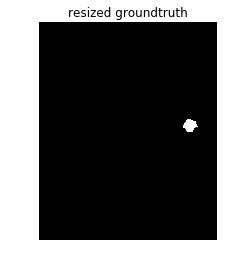

In [8]:
dim = (int(0.7*img_prp.shape[1]),int(0.7*img_prp.shape[0]))
# perform the actual resizing of the image and show it
resized_prp = cv2.resize(img_prp, dim, interpolation = cv2.INTER_AREA)
resized_grnd = cv2.resize(img_grnd, dim, interpolation = cv2.INTER_AREA)
show_image_plt(img_prp,"resized prp")
print(img_prp.shape)
print(resized_prp.shape)
show_image_plt(resized_prp,"resized prp")
show_image_plt(resized_grnd,"resized groundtruth")

In [7]:
#Set path to groundtruth data and save names in list
path = '/Users/briannaburton/Documents/Masters/S2-Cassino/Advanced-Image-Analysis/AIA-2018/dataset/groundtruth/'
tif_files = [f for f in os.listdir(path) if f.endswith('.tif')]

In [8]:
roi_size = 227
for i in range (0,len(tif_files)):
    #Read original and groundtruth image from list (tif_files)
    original_image = cv2.imread(os.path.join("/Users/briannaburton/Documents/Masters/S2-Cassino/Advanced-Image-Analysis/AIA-2018/dataset/images/",tif_files[i]),0)
    groundtruth_image = cv2.imread(os.path.join("/Users/briannaburton/Documents/Masters/S2-Cassino/Advanced-Image-Analysis/AIA-2018/dataset/groundtruth/", tif_files[i]),0)
    
    # Generate labels on the groundtruth
    nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(groundtruth_image)
    
    for idx in range (1, nlabels): # skip the background region and consider images wiht 2 ROIs
        pt1 = [int(centroids[idx][0]-roi_size), int(centroids[idx][1]-roi_size)]
        pt2 = [int(centroids[idx][0]+roi_size), int(centroids[idx][1]+roi_size)]
        if pt1[0] < 0:
            pt1[0] = 0
        elif pt1[1] < 0:
            pt1[1] = 0
        if pt2[0] < 0:
            pt2[0] = 0
        elif pt2[1] < 0:
            pt2[1] = 0
        #Crop image to ROI and save as TIF with 1_ or 2_ if first or second mass in groundtruth image
        roi = original_image[pt1[1]:pt2[1], pt1[0]:pt2[0]]
        cv2.imwrite(os.path.join("/Users/briannaburton/Documents/Masters/S2-Cassino/Distributed-Programming-and-Networking/Java_Mass_Detection/ROI_cropping/images10,000/pos/", str(idx)+ "_" + tif_files[i]), roi)

In [4]:
roi_size = 227
for i in range (0,len(tif_files)):
    #Read original and groundtruth image from list (tif_files)
    img_prp = cv2.imread(os.path.join("/Users/briannaburton/Documents/Masters/S2-Cassino/Advanced-Image-Analysis/AIA-2018/dataset/images/",tif_files[i]),0)
    img_grnd = cv2.imread(os.path.join("/Users/briannaburton/Documents/Masters/S2-Cassino/Advanced-Image-Analysis/AIA-2018/dataset/groundtruth/", tif_files[i]),0)
    
    # perform the actual resizing of the image and show it
    shrink_prp = cv2.resize(img_prp, (int(1.5*img_prp.shape[1]),int(1.5*img_prp.shape[0])), interpolation = cv2.INTER_AREA)
    shrink_grnd = cv2.resize(img_grnd, (int(1.5*img_prp.shape[1]),int(1.5*img_prp.shape[0])), interpolation = cv2.INTER_AREA)
    # Generate labels on the groundtruth
    nlabels, labels, stats, shrink_centroids = cv2.connectedComponentsWithStats(shrink_grnd)
    for idx in range (1, nlabels): # skip the background region and consider images wiht 2 ROIs
        pt1 = [int(shrink_centroids[idx][0]-roi_size), int(shrink_centroids[idx][1]-roi_size)]
        pt2 = [int(shrink_centroids[idx][0]+roi_size), int(shrink_centroids[idx][1]+roi_size)]
        if pt1[0] < 0:
            pt1[0] = 0
        elif pt1[1] < 0:
            pt1[1] = 0
        if pt2[0] < 0:
            pt2[0] = 0
        elif pt2[1] < 0:
            pt2[1] = 0
        #Crop image to ROI and save as TIF with 1_ or 2_ if first or second mass in groundtruth image
        roi = shrink_prp[pt1[1]:pt2[1], pt1[0]:pt2[0]]
        cv2.imwrite(os.path.join("/Users/briannaburton/Documents/Masters/S2-Cassino/Distributed-Programming-and-Networking/Java_Mass_Detection/ROI_cropping/images10,000/pos/", "enlarge1.5_" + str(idx)+ "_" + tif_files[i]), roi)
    
    # perform the actual resizing of the image and show it
    shrink_prp = cv2.resize(img_prp, (int(0.5*img_prp.shape[1]),int(0.5*img_prp.shape[0])), interpolation = cv2.INTER_AREA)
    shrink_grnd = cv2.resize(img_grnd, (int(0.5*img_prp.shape[1]),int(0.5*img_prp.shape[0])), interpolation = cv2.INTER_AREA)
    # Generate labels on the groundtruth
    nlabels, labels, stats, shrink_centroids = cv2.connectedComponentsWithStats(shrink_grnd)
    for idx in range (1, nlabels): # skip the background region and consider images wiht 2 ROIs
        pt1 = [int(shrink_centroids[idx][0]-roi_size), int(shrink_centroids[idx][1]-roi_size)]
        pt2 = [int(shrink_centroids[idx][0]+roi_size), int(shrink_centroids[idx][1]+roi_size)]
        if pt1[0] < 0:
            pt1[0] = 0
        elif pt1[1] < 0:
            pt1[1] = 0
        if pt2[0] < 0:
            pt2[0] = 0
        elif pt2[1] < 0:
            pt2[1] = 0
        #Crop image to ROI and save as TIF with 1_ or 2_ if first or second mass in groundtruth image
        roi = shrink_prp[pt1[1]:pt2[1], pt1[0]:pt2[0]]
        cv2.imwrite(os.path.join("/Users/briannaburton/Documents/Masters/S2-Cassino/Distributed-Programming-and-Networking/Java_Mass_Detection/ROI_cropping/images10,000/pos/", "shrink0.5_" + str(idx)+ "_" + tif_files[i]), roi)
    
    # perform the actual resizing of the image and show it
    shrink_prp = cv2.resize(img_prp, (int(1.3*img_prp.shape[1]),int(1.3*img_prp.shape[0])), interpolation = cv2.INTER_AREA)
    shrink_grnd = cv2.resize(img_grnd, (int(1.3*img_prp.shape[1]),int(1.3*img_prp.shape[0])), interpolation = cv2.INTER_AREA)
    # Generate labels on the groundtruth
    nlabels, labels, stats, shrink_centroids = cv2.connectedComponentsWithStats(shrink_grnd)
    for idx in range (1, nlabels): # skip the background region and consider images wiht 2 ROIs
        pt1 = [int(shrink_centroids[idx][0]-roi_size), int(shrink_centroids[idx][1]-roi_size)]
        pt2 = [int(shrink_centroids[idx][0]+roi_size), int(shrink_centroids[idx][1]+roi_size)]
        if pt1[0] < 0:
            pt1[0] = 0
        elif pt1[1] < 0:
            pt1[1] = 0
        if pt2[0] < 0:
            pt2[0] = 0
        elif pt2[1] < 0:
            pt2[1] = 0
        #Crop image to ROI and save as TIF with 1_ or 2_ if first or second mass in groundtruth image
        roi = shrink_prp[pt1[1]:pt2[1], pt1[0]:pt2[0]]
        cv2.imwrite(os.path.join("/Users/briannaburton/Documents/Masters/S2-Cassino/Distributed-Programming-and-Networking/Java_Mass_Detection/ROI_cropping/images10,000/pos/", "enlarge1.3_" + str(idx)+ "_" + tif_files[i]), roi)
    
    # perform the actual resizing of the image and show it
    shrink_prp = cv2.resize(img_prp, (int(0.9*img_prp.shape[1]),int(0.9*img_prp.shape[0])), interpolation = cv2.INTER_AREA)
    shrink_grnd = cv2.resize(img_grnd, (int(0.9*img_prp.shape[1]),int(0.9*img_prp.shape[0])), interpolation = cv2.INTER_AREA)
    # Generate labels on the groundtruth
    nlabels, labels, stats, shrink_centroids = cv2.connectedComponentsWithStats(shrink_grnd)
    for idx in range (1, nlabels): # skip the background region and consider images wiht 2 ROIs
        pt1 = [int(shrink_centroids[idx][0]-roi_size), int(shrink_centroids[idx][1]-roi_size)]
        pt2 = [int(shrink_centroids[idx][0]+roi_size), int(shrink_centroids[idx][1]+roi_size)]
        if pt1[0] < 0:
            pt1[0] = 0
        elif pt1[1] < 0:
            pt1[1] = 0
        if pt2[0] < 0:
            pt2[0] = 0
        elif pt2[1] < 0:
            pt2[1] = 0
        #Crop image to ROI and save as TIF with 1_ or 2_ if first or second mass in groundtruth image
        roi = shrink_prp[pt1[1]:pt2[1], pt1[0]:pt2[0]]
        cv2.imwrite(os.path.join("/Users/briannaburton/Documents/Masters/S2-Cassino/Distributed-Programming-and-Networking/Java_Mass_Detection/ROI_cropping/images10,000/pos/", "shrink0.9_" + str(idx)+ "_" + tif_files[i]), roi)
    
    # perform the actual resizing of the image and show it
    shrink_prp = cv2.resize(img_prp, (int(0.7*img_prp.shape[1]),int(0.7*img_prp.shape[0])), interpolation = cv2.INTER_AREA)
    shrink_grnd = cv2.resize(img_grnd, (int(0.7*img_prp.shape[1]),int(0.7*img_prp.shape[0])), interpolation = cv2.INTER_AREA)
    # Generate labels on the groundtruth
    nlabels, labels, stats, shrink_centroids = cv2.connectedComponentsWithStats(shrink_grnd)
    for idx in range (1, nlabels): # skip the background region and consider images wiht 2 ROIs
        pt1 = [int(shrink_centroids[idx][0]-roi_size), int(shrink_centroids[idx][1]-roi_size)]
        pt2 = [int(shrink_centroids[idx][0]+roi_size), int(shrink_centroids[idx][1]+roi_size)]
        if pt1[0] < 0:
            pt1[0] = 0
        elif pt1[1] < 0:
            pt1[1] = 0
        if pt2[0] < 0:
            pt2[0] = 0
        elif pt2[1] < 0:
            pt2[1] = 0
        #Crop image to ROI and save as TIF with 1_ or 2_ if first or second mass in groundtruth image
        roi = shrink_prp[pt1[1]:pt2[1], pt1[0]:pt2[0]]
        cv2.imwrite(os.path.join("/Users/briannaburton/Documents/Masters/S2-Cassino/Distributed-Programming-and-Networking/Java_Mass_Detection/ROI_cropping/images10,000/pos/", "shrink0.7_" + str(idx)+ "_" + tif_files[i]), roi)
    
    # perform the actual resizing of the image and show it
    shrink_prp = cv2.resize(img_prp, (int(1.1*img_prp.shape[1]),int(1.1*img_prp.shape[0])), interpolation = cv2.INTER_AREA)
    shrink_grnd = cv2.resize(img_grnd, (int(1.1*img_prp.shape[1]),int(1.1*img_prp.shape[0])), interpolation = cv2.INTER_AREA)
    # Generate labels on the groundtruth
    nlabels, labels, stats, shrink_centroids = cv2.connectedComponentsWithStats(shrink_grnd)
    for idx in range (1, nlabels): # skip the background region and consider images wiht 2 ROIs
        pt1 = [int(shrink_centroids[idx][0]-roi_size), int(shrink_centroids[idx][1]-roi_size)]
        pt2 = [int(shrink_centroids[idx][0]+roi_size), int(shrink_centroids[idx][1]+roi_size)]
        if pt1[0] < 0:
            pt1[0] = 0
        elif pt1[1] < 0:
            pt1[1] = 0
        if pt2[0] < 0:
            pt2[0] = 0
        elif pt2[1] < 0:
            pt2[1] = 0
        #Crop image to ROI and save as TIF with 1_ or 2_ if first or second mass in groundtruth image
        roi = shrink_prp[pt1[1]:pt2[1], pt1[0]:pt2[0]]
        cv2.imwrite(os.path.join("/Users/briannaburton/Documents/Masters/S2-Cassino/Distributed-Programming-and-Networking/Java_Mass_Detection/ROI_cropping/images10,000/pos/", "enlarge1.1_" + str(idx)+ "_" + tif_files[i]), roi)
    
    # perform the actual resizing of the image and show it
    shrink_prp = cv2.resize(img_prp, (int(1.7*img_prp.shape[1]),int(1.7*img_prp.shape[0])), interpolation = cv2.INTER_AREA)
    shrink_grnd = cv2.resize(img_grnd, (int(1.7*img_prp.shape[1]),int(1.7*img_prp.shape[0])), interpolation = cv2.INTER_AREA)
    # Generate labels on the groundtruth
    nlabels, labels, stats, shrink_centroids = cv2.connectedComponentsWithStats(shrink_grnd)
    for idx in range (1, nlabels): # skip the background region and consider images wiht 2 ROIs
        pt1 = [int(shrink_centroids[idx][0]-roi_size), int(shrink_centroids[idx][1]-roi_size)]
        pt2 = [int(shrink_centroids[idx][0]+roi_size), int(shrink_centroids[idx][1]+roi_size)]
        if pt1[0] < 0:
            pt1[0] = 0
        elif pt1[1] < 0:
            pt1[1] = 0
        if pt2[0] < 0:
            pt2[0] = 0
        elif pt2[1] < 0:
            pt2[1] = 0
        #Crop image to ROI and save as TIF with 1_ or 2_ if first or second mass in groundtruth image
        roi = shrink_prp[pt1[1]:pt2[1], pt1[0]:pt2[0]]
        cv2.imwrite(os.path.join("/Users/briannaburton/Documents/Masters/S2-Cassino/Distributed-Programming-and-Networking/Java_Mass_Detection/ROI_cropping/images10,000/pos/", "enlarge1.7_" + str(idx)+ "_" + tif_files[i]), roi)
    
    # perform the actual resizing of the image and show it
    shrink_prp = cv2.resize(img_prp, (int(0.3*img_prp.shape[1]),int(0.3*img_prp.shape[0])), interpolation = cv2.INTER_AREA)
    shrink_grnd = cv2.resize(img_grnd, (int(0.3*img_prp.shape[1]),int(0.3*img_prp.shape[0])), interpolation = cv2.INTER_AREA)
    # Generate labels on the groundtruth
    nlabels, labels, stats, shrink_centroids = cv2.connectedComponentsWithStats(shrink_grnd)
    for idx in range (1, nlabels): # skip the background region and consider images wiht 2 ROIs
        pt1 = [int(shrink_centroids[idx][0]-roi_size), int(shrink_centroids[idx][1]-roi_size)]
        pt2 = [int(shrink_centroids[idx][0]+roi_size), int(shrink_centroids[idx][1]+roi_size)]
        if pt1[0] < 0:
            pt1[0] = 0
        elif pt1[1] < 0:
            pt1[1] = 0
        if pt2[0] < 0:
            pt2[0] = 0
        elif pt2[1] < 0:
            pt2[1] = 0
        #Crop image to ROI and save as TIF with 1_ or 2_ if first or second mass in groundtruth image
        roi = shrink_prp[pt1[1]:pt2[1], pt1[0]:pt2[0]]
        cv2.imwrite(os.path.join("/Users/briannaburton/Documents/Masters/S2-Cassino/Distributed-Programming-and-Networking/Java_Mass_Detection/ROI_cropping/images10,000/pos/", "shrink0.3_" + str(idx)+ "_" + tif_files[i]), roi)

In [9]:
roi_size = 227
for i in range (0,len(tif_files)):
    #Read original and groundtruth image from list (tif_files)
    img_prp = cv2.imread(os.path.join("/Users/briannaburton/Documents/Masters/S2-Cassino/Advanced-Image-Analysis/AIA-2018/dataset/images/",tif_files[i]),0)
    img_grnd = cv2.imread(os.path.join("/Users/briannaburton/Documents/Masters/S2-Cassino/Advanced-Image-Analysis/AIA-2018/dataset/groundtruth/", tif_files[i]),0)
    
    # perform the actual resizing of the image and show it
    shrink_prp = cv2.resize(img_prp, (int(1.2*img_prp.shape[1]),int(1.2*img_prp.shape[0])), interpolation = cv2.INTER_AREA)
    shrink_grnd = cv2.resize(img_grnd, (int(1.2*img_prp.shape[1]),int(1.2*img_prp.shape[0])), interpolation = cv2.INTER_AREA)
    # Generate labels on the groundtruth
    nlabels, labels, stats, shrink_centroids = cv2.connectedComponentsWithStats(shrink_grnd)
    for idx in range (1, nlabels): # skip the background region and consider images wiht 2 ROIs
        pt1 = [int(shrink_centroids[idx][0]-roi_size), int(shrink_centroids[idx][1]-roi_size)]
        pt2 = [int(shrink_centroids[idx][0]+roi_size), int(shrink_centroids[idx][1]+roi_size)]
        if pt1[0] < 0:
            pt1[0] = 0
        elif pt1[1] < 0:
            pt1[1] = 0
        if pt2[0] < 0:
            pt2[0] = 0
        elif pt2[1] < 0:
            pt2[1] = 0
        #Crop image to ROI and save as TIF with 1_ or 2_ if first or second mass in groundtruth image
        roi = shrink_prp[pt1[1]:pt2[1], pt1[0]:pt2[0]]
        cv2.imwrite(os.path.join("/Users/briannaburton/Documents/Masters/S2-Cassino/Distributed-Programming-and-Networking/Java_Mass_Detection/ROI_cropping/images10,000/pos/", "enlarge1.2_" + str(idx)+ "_" + tif_files[i]), roi)
    
    # perform the actual resizing of the image and show it
    shrink_prp = cv2.resize(img_prp, (int(0.8*img_prp.shape[1]),int(0.8*img_prp.shape[0])), interpolation = cv2.INTER_AREA)
    shrink_grnd = cv2.resize(img_grnd, (int(0.8*img_prp.shape[1]),int(0.8*img_prp.shape[0])), interpolation = cv2.INTER_AREA)
    # Generate labels on the groundtruth
    nlabels, labels, stats, shrink_centroids = cv2.connectedComponentsWithStats(shrink_grnd)
    for idx in range (1, nlabels): # skip the background region and consider images wiht 2 ROIs
        pt1 = [int(shrink_centroids[idx][0]-roi_size), int(shrink_centroids[idx][1]-roi_size)]
        pt2 = [int(shrink_centroids[idx][0]+roi_size), int(shrink_centroids[idx][1]+roi_size)]
        if pt1[0] < 0:
            pt1[0] = 0
        elif pt1[1] < 0:
            pt1[1] = 0
        if pt2[0] < 0:
            pt2[0] = 0
        elif pt2[1] < 0:
            pt2[1] = 0
        #Crop image to ROI and save as TIF with 1_ or 2_ if first or second mass in groundtruth image
        roi = shrink_prp[pt1[1]:pt2[1], pt1[0]:pt2[0]]
        cv2.imwrite(os.path.join("/Users/briannaburton/Documents/Masters/S2-Cassino/Distributed-Programming-and-Networking/Java_Mass_Detection/ROI_cropping/images10,000/pos/", "shrink0.8_" + str(idx)+ "_" + tif_files[i]), roi)
    